In [62]:
import numpy as np
import pandas as pd
import ndjson

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# load primitives (w date tags)
with open('../data/primitives_220330/primitives_corrected.ndjson') as fin:
    primitives_corr = ndjson.load(fin)


# load representations
ev = np.load(
    '../lda/representation_final_50.npy',
    allow_pickle=True
    )

# object structure
print('\n'.join([
    f'shape: {ev.shape}',
    f'first subelement, document id: e.g. {ev[0][0]}',
    f'second subelement, cosine similarity to all topic centroids: shape {ev[0][1].shape}'
]))

shape: (112277, 2)
first subelement, document id: e.g. 1
second subelement, cosine similarity to all topic centroids: shape (415,)


## top level descriptives

#### full corpus

In [35]:
df_sims = (
    pd.DataFrame([doc[1] for doc in ev])
    .reset_index()
    .melt(id_vars=['index'], var_name='topic', value_name='cos_sim')
)

In [49]:
df_sims_avgs = df_sims.groupby('topic').describe()
df_sims_avgs

index                                                         \
          count     mean           std  min      25%      50%      75%   
topic                                                                    
0      112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
1      112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
2      112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
3      112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
4      112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
...         ...      ...           ...  ...      ...      ...      ...   
410    112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
411    112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
412    112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
413    112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   
414    112277.0  56138.0  32411.722424  0.0  28069.0  56138.0  84207.0   

                  cos_sim                                                    \
            max     count      mean       std       min       25%       50%   
topic                                                                         
0      112276.0  112277.0  0.234368  0.160060 -0.410689  0.124128  0.217255   
1      112276.0  112277.0  0.181570  0.137021 -0.423488  0.087838  0.168328   
2      112276.0  112277.0  0.169303  0.124450 -0.378276  0.082599  0.157151   
3      112276.0  112277.0  0.162227  0.121740 -0.392795  0.077429  0.150696   
4      112276.0  112277.0  0.157359  0.121994 -0.405336  0.072105  0.145186   
...         ...       ...       ...       ...       ...       ...       ...   
410    112276.0  112277.0  0.119970  0.132641 -0.453709  0.029770  0.101398   
411    112276.0  112277.0  0.117172  0.132131 -0.382334  0.026032  0.099218   
412    112276.0  112277.0  0.109506  0.129656 -0.403995  0.019623  0.088746   
413    112276.0  112277.0  0.071237  0.108686 -0.371368  0.002512  0.039736   
414    112276.0  112277.0  0.021955  0.070007 -0.285700 -0.020997  0.028069   

                           
            75%       max  
topic                      
0      0.319083  0.921744  
1      0.258867  0.952149  
2      0.245347  0.921483  
3      0.238021  0.918308  
4      0.233051  0.876158  
...         ...       ...  
410    0.188944  0.973865  
411    0.186489  0.955048  
412    0.179385  0.941482  
413    0.114591  0.917875  
414    0.061282  0.803105  

[415 rows x 16 columns]

<AxesSubplot:xlabel='max', ylabel='Count'>

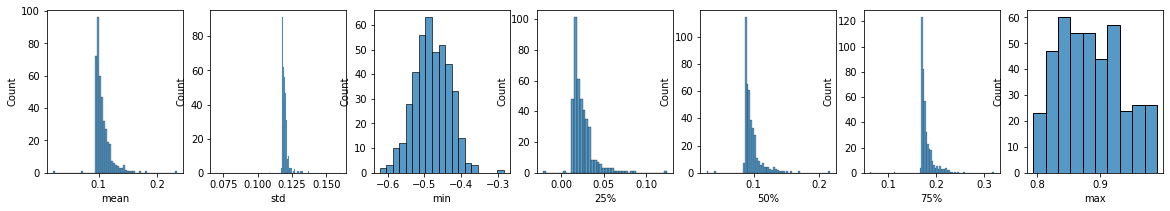

In [61]:
# distributions
fig, axs = plt.subplots(1, 7, figsize=(20,3))
sns.histplot(df_sims_avgs['cos_sim']['mean'], ax=axs[0])
sns.histplot(df_sims_avgs['cos_sim']['std'], ax=axs[1])
sns.histplot(df_sims_avgs['cos_sim']['min'], ax=axs[2])
sns.histplot(df_sims_avgs['cos_sim']['25%'], ax=axs[3])
sns.histplot(df_sims_avgs['cos_sim']['50%'], ax=axs[4])
sns.histplot(df_sims_avgs['cos_sim']['75%'], ax=axs[5])
sns.histplot(df_sims_avgs['cos_sim']['max'], ax=axs[6])

#### corrected corpus

In [68]:
subset_doc_ids = [doc['id'] for doc in primitives_corr]

df_sims_subset = (
    pd.DataFrame([doc[1] for doc in ev if doc[0] in subset_doc_ids])
    .reset_index()
    .melt(id_vars=['index'], var_name='topic', value_name='cos_sim')
)

In [69]:
df_sims_subset_avgs = df_sims_subset.groupby('topic').describe()
df_sims_subset_avgs

index                                                                \
         count     mean          std  min     25%      50%      75%      max   
topic                                                                          
0      33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
1      33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
2      33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
3      33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
4      33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
...        ...      ...          ...  ...     ...      ...      ...      ...   
410    33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
411    33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
412    33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
413    33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   
414    33557.0  16778.0  9687.215828  0.0  8389.0  16778.0  25167.0  33556.0   

       cos_sim                                                              \
         count      mean       std       min       25%       50%       75%   
topic                                                                        
0      33557.0  0.203456  0.117511 -0.346590  0.116652  0.213945  0.287288   
1      33557.0  0.180789  0.122075 -0.416550  0.088719  0.179872  0.264526   
2      33557.0  0.174738  0.124275 -0.362282  0.083223  0.165326  0.259048   
3      33557.0  0.168776  0.124492 -0.353343  0.078777  0.158344  0.251703   
4      33557.0  0.163952  0.128174 -0.308549  0.070810  0.149445  0.249271   
...        ...       ...       ...       ...       ...       ...       ...   
410    33557.0  0.113158  0.123929 -0.382055  0.030805  0.095534  0.174095   
411    33557.0  0.110713  0.123226 -0.346003  0.027707  0.093798  0.171824   
412    33557.0  0.106290  0.121026 -0.390464  0.025078  0.087111  0.168835   
413    33557.0  0.078276  0.104131 -0.303782  0.010634  0.051157  0.126463   
414    33557.0  0.030169  0.057374 -0.245363 -0.005704  0.025844  0.058977   

                 
            max  
topic            
0      0.623007  
1      0.637807  
2      0.636261  
3      0.692867  
4      0.690943  
...         ...  
410    0.897884  
411    0.951267  
412    0.941482  
413    0.828067  
414    0.742084  

[415 rows x 16 columns]

<AxesSubplot:xlabel='max', ylabel='Count'>

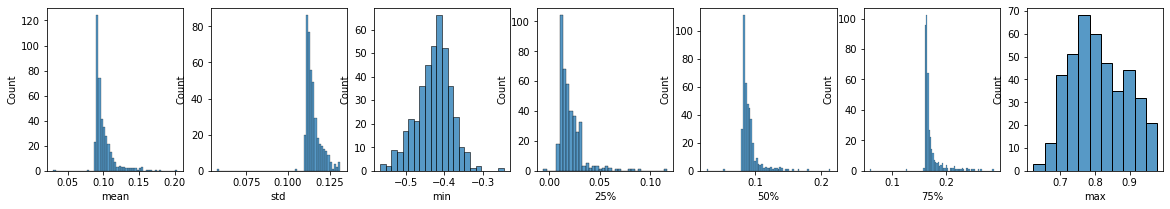

In [71]:
# distributions
fig, axs = plt.subplots(1, 7, figsize=(20,3))
sns.histplot(df_sims_subset_avgs['cos_sim']['mean'], ax=axs[0])
sns.histplot(df_sims_subset_avgs['cos_sim']['std'], ax=axs[1])
sns.histplot(df_sims_subset_avgs['cos_sim']['min'], ax=axs[2])
sns.histplot(df_sims_subset_avgs['cos_sim']['25%'], ax=axs[3])
sns.histplot(df_sims_subset_avgs['cos_sim']['50%'], ax=axs[4])
sns.histplot(df_sims_subset_avgs['cos_sim']['75%'], ax=axs[5])
sns.histplot(df_sims_subset_avgs['cos_sim']['max'], ax=axs[6])

#### comments
seems like distributions are similar between annotated corpus & corrected corpus.  
Slighlty less extreme minima and maxima in corrected corpus.

In both cases though, the average document is very weakly related to all topics.

## per-topic descriptives

In [67]:
primitives_corr[3]

{'date': ['1735-xx-xx'],
 'text': 'later door een ander vervolgd tot  1735 . Verkort afschrift naar het Handschrift door D. Fockema beschreven in de Vrye Fries, VI 127 en thans in t bezit der Stad Dokkum. zie verder het Naberigt. pag 1 Ao',
 'call_nr': '1735_Dokk_Hesm',
 'id': 484}